<h1 align='center' style="color: blue;">Assignment #2</h1>

<p><b>Question #1</b>: 
<p>Consider the MNIST dataset:</p> 

In [290]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

As you know, each X represents a flattened version of a 28 * 28 pixel image in 2 dimensions. You can visualize a sample digit image using the following code.

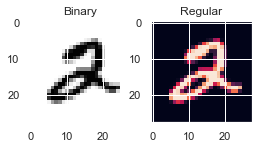

In [291]:
import matplotlib as mpl
import matplotlib.pyplot as plt

a_sample_digit = X[5]
a_sample_digit_image = a_sample_digit.reshape(28,28)

fig, axes = plt.subplots(1,2, figsize=(4,8))
axes[0].imshow(a_sample_digit_image, cmap='binary')
axes[1].imshow(a_sample_digit_image)

axes[0].set_title("Binary")
axes[1].set_title("Regular")

plt.show()

Your job is to convert this image to a three-dimensional image and change its font color to red with a white background. Visualize your imgae.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


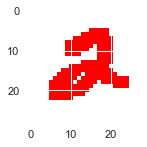

In [292]:
# Write your answer here
img2 = np.zeros([28,28,3])
red_mask = a_sample_digit_image[:,:]>0
img2[:,:,1] =250
img2[:,:,2] =250
img2[red_mask,1] = 0
img2[red_mask,2] =0
img2[:,:,0] =250


f, ax = plt.subplots(figsize=(2,5))
ax.imshow(img2)
plt.show()

<p><b>Question #2</b>:</p>
<p><b>Important Note:</b> In this Question you need to use Stochastic Gradient Descent classifier. Read more about this classifier at:<p>
<p><b>Link1: </b><a href='https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31'>Click Here</a></p>
<p><b>Link2: </b><a href='https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307'>Click Here</a></p>

You can import this classifer from scikit-learn package using the following code: 

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

<b>Note:</b> Use SGDClassifier with its own default hyperparameters.

<ol>
    <li>Consider the MNIST dataset again and follow the steps discussed in the class on the development of predictive models using the scikit-learn package. Develop a <u>Stochastic Gradient Descent</u> classifier that can distinguish digit 7 from the other digits.</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</li>  
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
        <li>What is the accuracy of your model for out-of-sample data?</li>
        <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores for in-sample and out-of-sample data.</li>
    <li>Create a second classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li><b style="color:red">DO NOT USE STRATIFY THIS TIME.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the second classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Create a third classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
        <li>Use <u><b>85%</b></u> of data for tarining and consider <u><b>15%</b></u> of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the third classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Compare the three models. Which one works the best? Explain.</li>
</ol>

In [294]:
# Write your answer here (part1)

COB =SGDClassifier()
X = mnist['data']
y = mnist ['target']
y = y.astype(np.uint8)
s=y.shape
y1 = np.zeros(s)
y1[y==7] = 1
X_train, X_test, y_train , y_test = train_test_split(X,y1, random_state = 0 ,stratify = y1,test_size = 0.3 )
COB.fit(X_train,y_train)
y_test_hat = COB.predict(X_test)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [295]:
# Write your answer here (part2)
print("accuracy for out of sample data",accuracy_score(y_test, y_test_hat))

accuracy for out of sample data 0.9788571428571429


In [296]:
# Write your answer here (part3)
y_train_hat = COB.predict(X_train)
print("Classification Report for Out-sample \n",classification_report(y_test,y_test_hat))
print("Classification Report for In-sample \n ",classification_report(y_train,y_train_hat))


Classification Report for Out-sample 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18812
         1.0       0.91      0.88      0.90      2188

    accuracy                           0.98     21000
   macro avg       0.95      0.94      0.94     21000
weighted avg       0.98      0.98      0.98     21000

Classification Report for In-sample 
                precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     43895
         1.0       0.93      0.89      0.91      5105

    accuracy                           0.98     49000
   macro avg       0.96      0.94      0.95     49000
weighted avg       0.98      0.98      0.98     49000



In [297]:
# Write your answer here (part4)
COB2 = SGDClassifier()
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)
y2 = np.zeros(y.shape)
y2[y == 7] = 1
x_train,x_test, y_train, y_test = train_test_split(X,y2,random_state = 0,test_size = 0.3)
COB2.fit(x_train,y_train)
y_hat = COB2.predict(x_test)


In [298]:
# Write your answer here (part5)
print("accuracy for out of sample data",accuracy_score(y_test,y_hat))

accuracy for out of sample data 0.9733333333333334


In [299]:
# Write your answer here (part6)
y_train_hat = COB2.predict(x_train)
print("Classification Report for in sample data is \n ",classification_report(y_train,y_train_hat))
print("Classification Report for Out sample data is \n ",classification_report(y_test,y_hat))

Classification Report for in sample data is 
                precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     43896
         1.0       0.91      0.87      0.89      5104

    accuracy                           0.98     49000
   macro avg       0.95      0.93      0.94     49000
weighted avg       0.98      0.98      0.98     49000

Classification Report for Out sample data is 
                precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18811
         1.0       0.89      0.85      0.87      2189

    accuracy                           0.97     21000
   macro avg       0.93      0.92      0.93     21000
weighted avg       0.97      0.97      0.97     21000



In [300]:
# Write your answer here (part7)
COB3 = SGDClassifier()
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)
y3 = np.zeros(y.shape)
y3[y == 7] = 1
x_train,x_test, y_train, y_test = train_test_split(X,y3, random_state = 0, stratify = y3,test_size = 0.15)
COB3.fit(x_train,y_train)
y_hat = COB3.predict(x_test)

In [301]:
# Write your answer here (part8)
print("the accuracy score for out of sample data is ",accuracy_score(y_test,y_hat))

the accuracy score for out of sample data is  0.9643809523809523


In [302]:
# Write your answer here (part9)
y_train_hat = COB3.predict(x_train)
print("Classification Report for In sample data is \n ",classification_report(y_train,y_train_hat))
print("Classification Report for Out of sample data is \n",classification_report(y_test,y_hat))

Classification Report for In sample data is 
                precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     53301
         1.0       0.77      0.97      0.86      6199

    accuracy                           0.97     59500
   macro avg       0.88      0.97      0.92     59500
weighted avg       0.97      0.97      0.97     59500

Classification Report for Out of sample data is 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      9406
         1.0       0.76      0.97      0.85      1094

    accuracy                           0.96     10500
   macro avg       0.88      0.96      0.91     10500
weighted avg       0.97      0.96      0.97     10500



In [303]:
# Write your answer here (part10)
print("Acoording to the observation the first model is the best when we consider it regarding the F1 score as F1 acore is based on both precison and recall")

Acoording to the observation the first model is the best when we consider it regarding the F1 score as F1 acore is based on both precisoon and recall


<p><b>Question #3</b>: 
<ol>
    <li>Download the heart.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Creat a new column named <b>'age_cat'</b> in the DataFrame to present individuals' age with 4 categories. Here is the list of categories:
        <ul>
            <li>25-35</li>
            <li>36-45</li>
            <li>46-55</li>
            <li>56-65</li>
            <li>65+</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability and creat a pie chart to show the percentage of individuals in each age category.
        <ul>
            <li>Use the <u>Explode</u> feature of pie chart in matplotlib to separate the age category of 46-55.</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability to creat a histogram with with 15 bins and white edgecolor to visualize the distribution of <b>"chol"</b> feature. Then use the annotation function to point to the bin with the highest value.
    <ul>
        <li>use the <b style='color:red'>np.histogram</b> function to clearly determine the value of each bin.</li>
    </ul>
    </li>
    <li>Use <u>logistic regression</u> to create a prediction model
        <ul>
            <li>Use 65% of data for tarining and consider 35% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (13 features in the orignal dataset, you don't need to use age_cat) to creat your predictive model</li>
            <li><b>traget</b> is your dependent variable. It shows whether the subject suffers form a heart disease or not.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Visualize the confusion matrix using a heatmap for both logistic regression, and naive bayes.</li>
</ol>
</p>

In [304]:
# Write your answer here (part1)
heart_data = pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [305]:
# Write your answer here (part2)
labels = ["25-35","36-45","46-55","56-65","65+"]
bins = [25,35,45,55,65,100] 
heart_data["age_cat"] = pd.cut(heart_data.age, bins,labels=labels)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,56-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,36-45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,56-65
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,56-65
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,36-45
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,65+
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,56-65


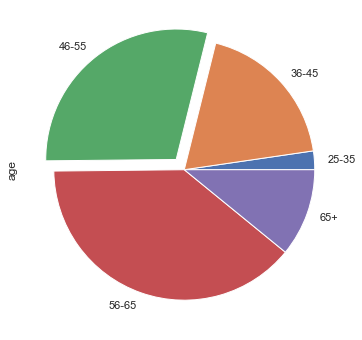

In [306]:
# Write your answer here (part3)

pie = heart_data.loc[:,["age","age_cat"]]
pie=pie.groupby("age_cat").count()
pie.plot(kind='pie', y='age', figsize=(6, 6), explode = [0,0,0.1,0,0], legend=False)
plt.show()


Text(230, 80, 'Highest Value')

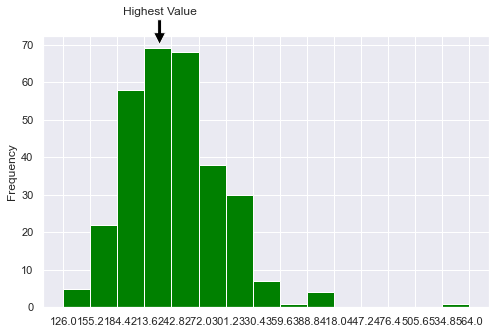

In [307]:
# Write your answer here (part4)
f, a = plt.subplots()
chol = heart_data.loc[:,["chol"]]
count, bin_edges = np.histogram(chol["chol"], bins=15)
chol["chol"].plot(kind = "hist",xticks = bin_edges,bins = 15, color = "green" , edgecolor = "white", ax = a ,figsize = (8,5))


a.annotate("Highest Value", xy = (230, 70), xytext = (230, 80),
            arrowprops = dict(facecolor='black'),
            horizontalalignment='center', verticalalignment='top')

In [308]:
# Write your answer here (part5)
heart_data = heart_data.drop(["age_cat"],axis = 1)
X = heart_data.loc[:,"age":"thal"]
y = heart_data.loc[:,"target"]
LR = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size = 0.35)
LR.fit(X_train, y_train)
y_hat = LR.predict(X_test)
accuracy_score(y_test,y_hat)

C:\Users\Rohith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.822429906542056

In [309]:
# Write your answer here (part6)
Gauss = GaussianNB()
X = heart_data.loc[:,"age":"thal"]
Y = heart_data.loc[:,"target"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.35)
Gauss.fit(X_train, Y_train)
Y_hat = Gauss.predict(X_test)
Ytrain = Gauss.predict(X_train)


In [337]:
# Write your answer here (part7)

print("The accuracy for in sample is \n",accuracy_score(Y_train,Ytrain))
print("The accuracy for out of the sample is \n",accuracy_score(Y_test,Y_hat))
print("The traing model has an higher accuracy as the dataset is the same and it is easier for the developed model to predict the outcome\nThe model developed by me had a similar result")

The accuracy for in sample is 
 0.8469387755102041
The accuracy for out of the sample is 
 0.794392523364486
The traing model has an higher accuracy as the dataset is the same and it is easier for the developed model to predict the outcome
The model developed by me had a similar result


The confusion matrix for Logistic Regression is 
 [[39 14]
 [ 5 49]]


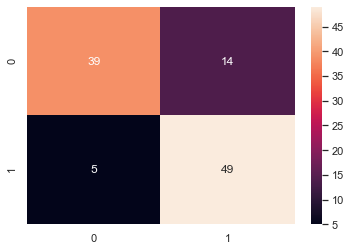

The confusion matrix for Naive Bayes is 
 [[38 15]
 [ 7 47]]


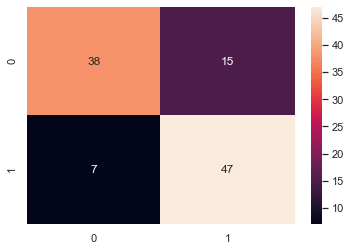

In [312]:
# Write your answer here (part8)
cmLR = confusion_matrix(y_test,y_hat)
print("The confusion matrix for Logistic Regression is \n",cmLR)
sns.heatmap(cmLR,annot = True)
plt.show()


cmNB = confusion_matrix(Y_test, Y_hat)
print("The confusion matrix for Naive Bayes is \n",cmNB)
sns.heatmap(cmNB,annot = True)
plt.show()

<p><b>Question #4</b>:
<ol>
    <li>Download the Employee_Retention.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert <b>Sales</b> and <b>Salary</b> categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original Sales and Salary columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>number_project</b>, <b>average_montly_hours</b>, and <b>time_spend_company</b> columns.</li>
    <li>Use KNN to create three predictive models (1. with 3 neighbors, 2. with 4 neighbors, 3. with 7 neighbors)
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style='color:red'>stratify</b> attribute in your split.</li> 
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 5 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>satisfaction_level</b> and <b>last_evaluation</b> features as your independent variables.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [313]:
# Write your answer here (part1)
Emp = pd.read_csv("Employee_Retention.csv")
Emp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [314]:
# Write your answer here (part2)
Emp_Ret = pd.get_dummies(Emp, columns=['sales','salary']) 
Emp_Ret = Emp_Ret.drop(['sales_technical', 'salary_low'], axis = 1) 
Emp_Ret


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,salary_high,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [315]:
# Write your answer here (part3)
fnames = ['number_project', 'average_montly_hours', 'time_spend_company'] 
features = Emp_Ret[fnames]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
Emp_Ret[fnames] = features
Emp_Ret.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,salary_high,salary_medium
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,0.971113,1.220423,1.713436,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,2.593763,1.420657,0.343655,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,0.971113,0.439508,1.028546,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [316]:
X = Emp_Ret.loc[:,Emp_Ret.columns != 'left'] 
y = Emp_Ret.loc[:,'left']
X_train, X_test, y_train, y_test = train_test_split(X, y ,stratify = y, test_size=0.3, random_state=0)
p_dict = {}
n_neighbors = [3,4,7]
for i in n_neighbors:
    KN = KNeighborsClassifier(n_neighbors = i)
    KN.fit(X_train, y_train)
    p_dict[i]=KN.predict(X_test)



In [317]:
# Write your answer here (part5)
for i,j in p_dict.items():
    accuracy = accuracy_score(y_test,j)
    print("accuracy score for {} neighbors".format(i),'=',accuracy)


accuracy score for 3 neighbors = 0.9471111111111111
accuracy score for 4 neighbors = 0.9453333333333334
accuracy score for 7 neighbors = 0.9455555555555556


In [325]:
# Write your answer here (part6)

x = Emp_Ret.iloc[:,0:2]
y = Emp_Ret.loc[:,'left']

KNN5 = KNeighborsClassifier(n_neighbors=5) 
KNN5.fit(x,y);



KNeighborsClassifier()

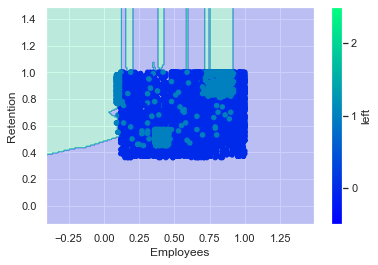

In [326]:
# Write your answer here (part7)
x_min, x_max = X_train.iloc[:, 0].min() - .5, X_train.iloc[:, 0].max() + .5 
y_min, y_max = X_train.iloc[:, 1].min() - .5, X_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = KNN5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y, s=20 ,cmap='winter')
plt.colorbar(ticks=range(3), label='left')
plt.clim(-0.5, 2.5)

plt.xlabel('Employees')
plt.ylabel('Retention');
plt.show()

<p><b>Question #5</b>:</p>

<ol>
    <li>Download the Cars.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert categorical variables to dummy variables.</li>
    <li>Create scatter plots to show the relationship between variables.
    <ul>
        <li>Put appropriate title, axis labels and legend for your visualization.</li>
        <li>Use the following variables in your work.</li>
        <ol>
            <li>Year (continuous variable)</li>
            <li>Transmission Type (categorical variable)</li>
            <li>Driven_Wheels (categorical variable)</li>
            <li>Number of Doors (categorical variable)</li>
            <li>Highway MPG (continuous variable)</li>
            <li>City MPG (continuous variable)</li>
            <li>Popularity (continuous variable)</li>
            <li>MSRP (continuous variable)</li>
        </ol>
    </ul>
    </li>
    <li>Run explonatory linear regression using <u>statsmodels</u> package.
    <ul>
        <li><b>MSRP</b> (Manufacturer Suggested Retail Price) is your target variable.</li>
    </ul>
    </li>
    <li>Which factors are significant at <b>.05</b> level in your model?</li>
    <li>What is the $R^2$ for your model? What does $R^2$ mean in this analysis?</li>
    <li>Use linear regression to creat a predictive model.
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use all features to create you predictive model.</li>
        <li><b>MSRP</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li>
</ol>

</p>

In [328]:
# Write your answer here (part1)
cars = pd.read_csv("Cars.csv")
cars



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [329]:
# Write your answer here (part2)
cars = pd.get_dummies(cars, columns=["Transmission Type","Driven_Wheels","Number of Doors"])
cars = cars.drop(["Make","Model","Engine Fuel Type","Engine HP","Engine Cylinders","Market Category","Vehicle Size","Vehicle Style"],axis = 1)
cars


,Year,highway MPG,city mpg,Popularity,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0
0,2011,26,19,3916,46135,0,0,0,1,0,0,0,0,1,1,0,0
1,2011,28,19,3916,40650,0,0,0,1,0,0,0,0,1,1,0,0
2,2011,28,20,3916,36350,0,0,0,1,0,0,0,0,1,1,0,0
3,2011,28,18,3916,29450,0,0,0,1,0,0,0,0,1,1,0,0
4,2011,28,18,3916,34500,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,23,16,204,46120,0,1,0,0,0,1,0,0,0,0,0,1
11910,2012,23,16,204,56670,0,1,0,0,0,1,0,0,0,0,0,1
11911,2012,23,16,204,50620,0,1,0,0,0,1,0,0,0,0,0,1
11912,2013,23,16,204,50920,0,1,0,0,0,1,0,0,0,0,0,1


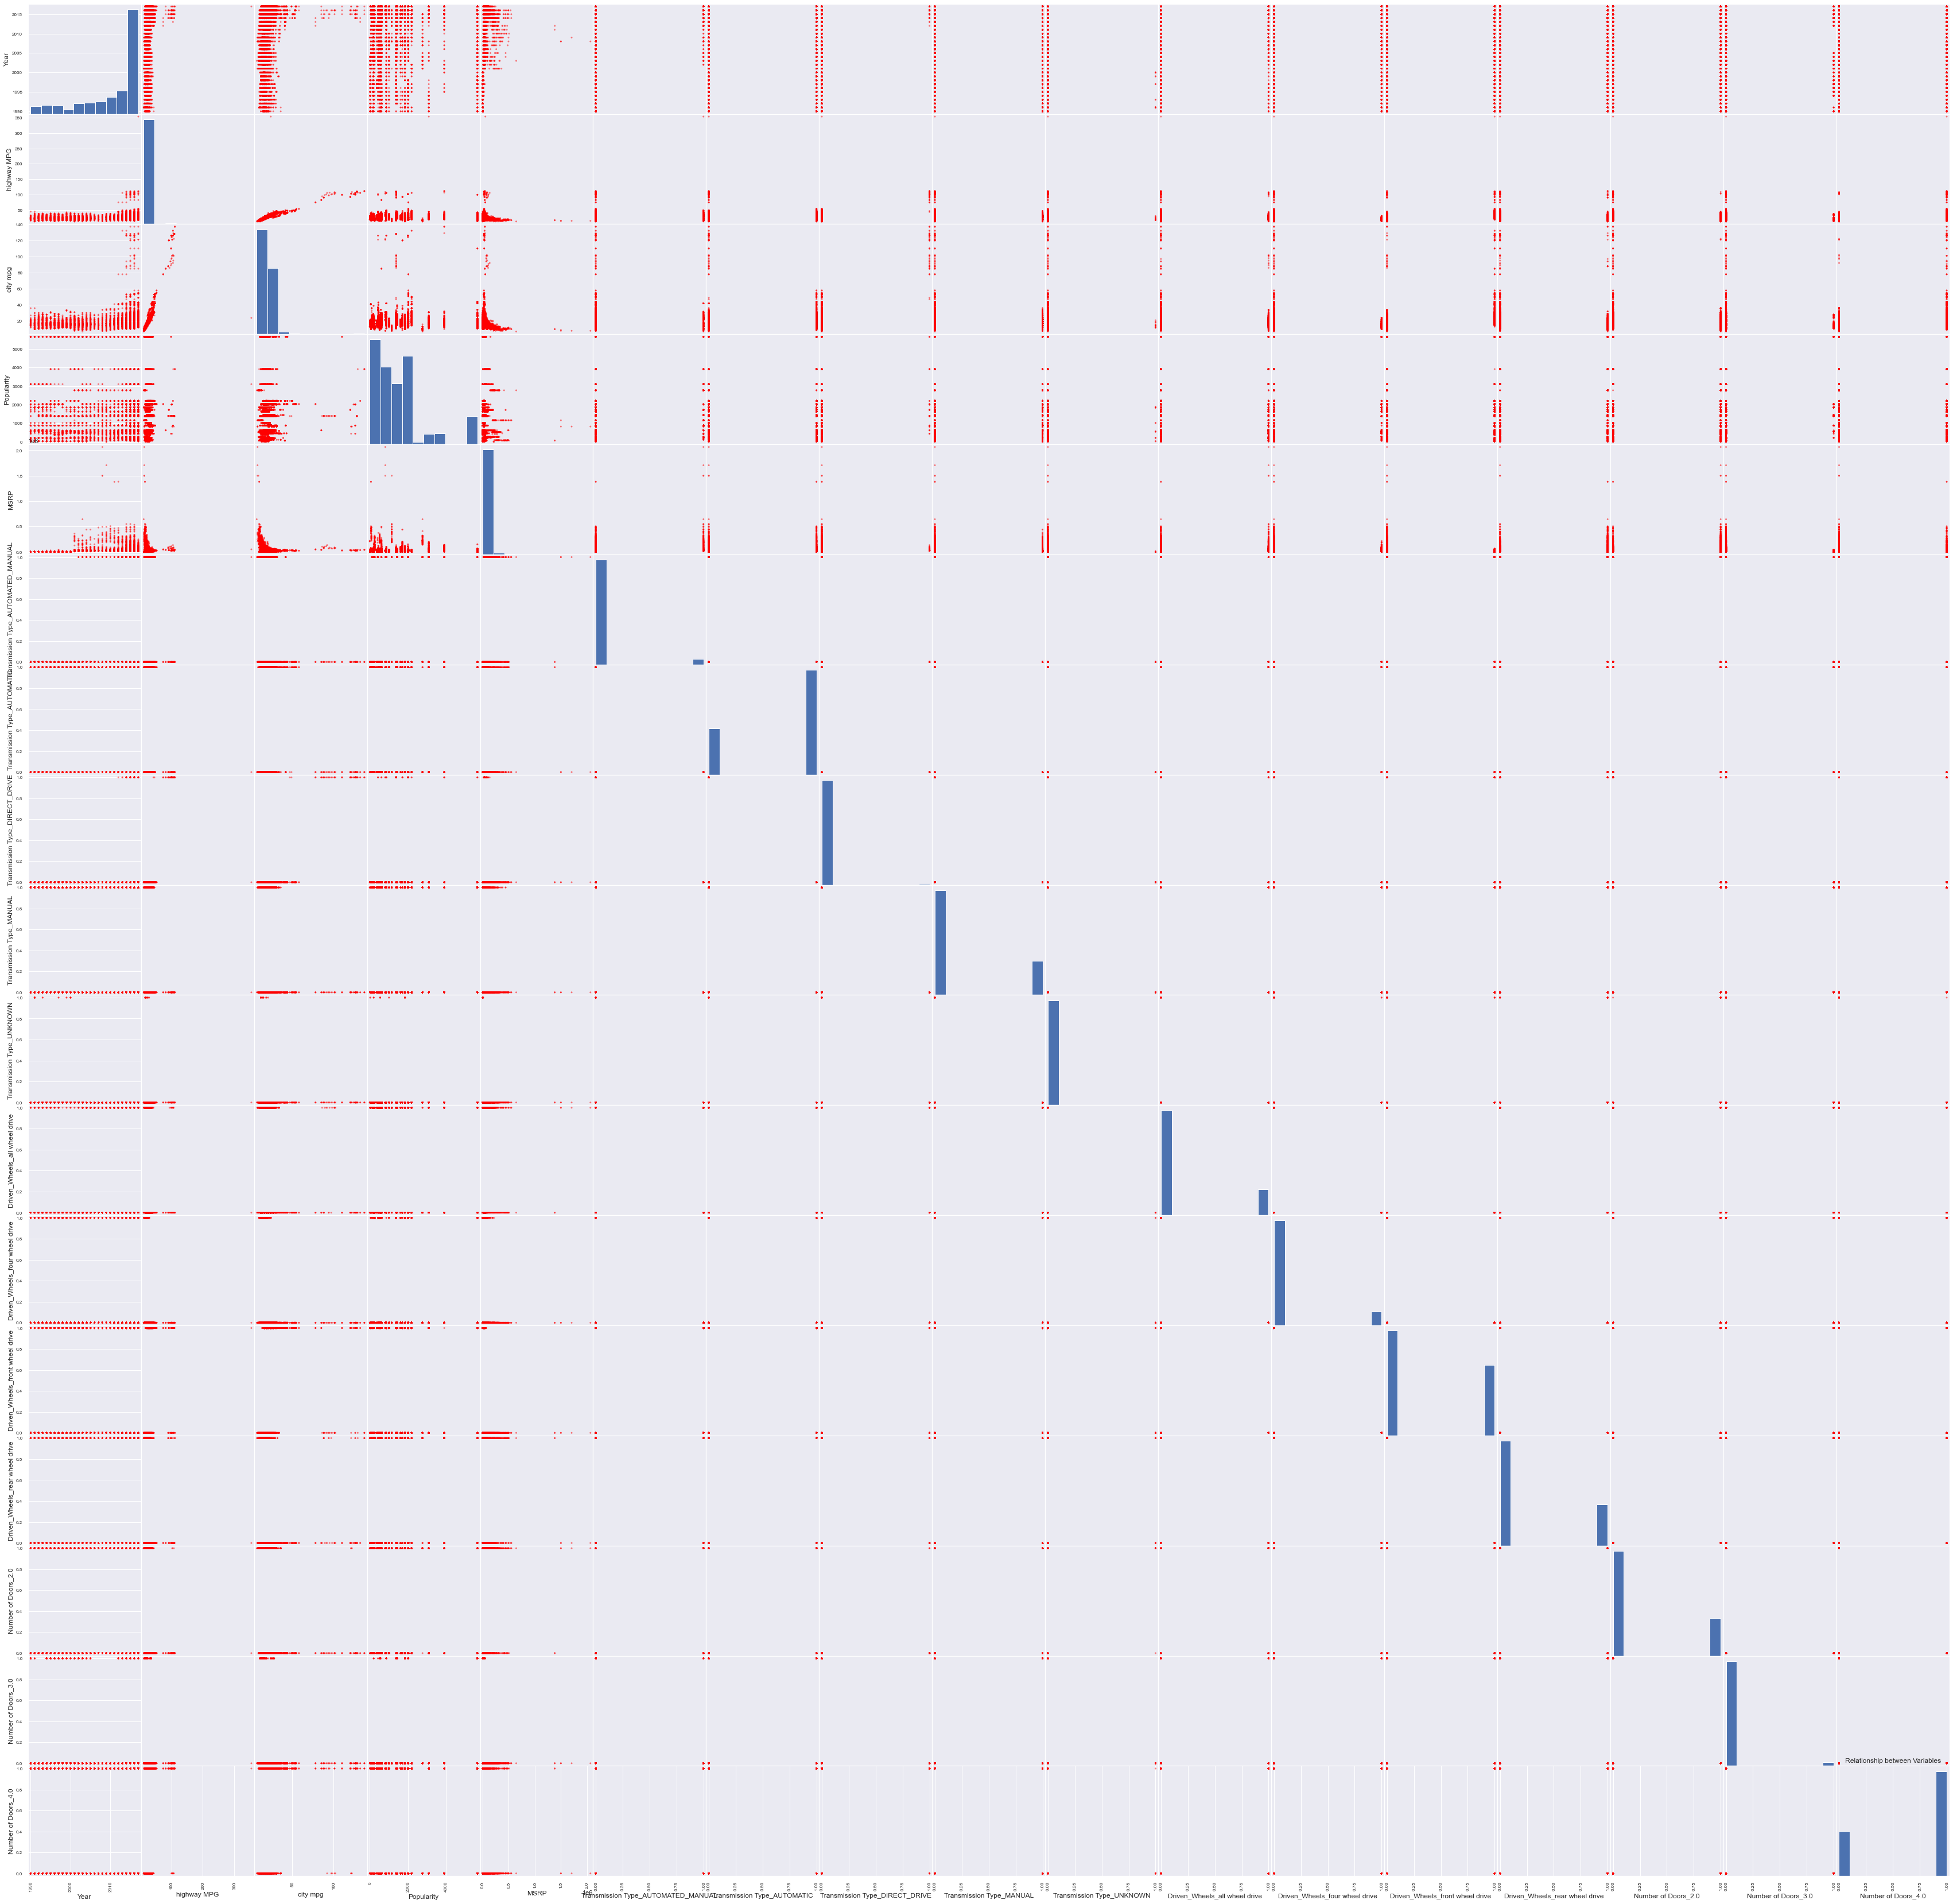

In [330]:
# Write your answer here (part3)
scatter_matrix(cars[:],figsize=(60,60),color = "red")
plt.title("Relationship between Variables")
plt.show()



In [331]:
# Write your answer here (part4)
cars =cars[ [ i for i in cars.columns if i != 'MSRP' ] + ['MSRP'] ]
X = cars.loc[:,"Year":"Number of Doors_4.0"]
y = cars.loc[:,"MSRP"]
LS = sm.OLS(y, X).fit()
LS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     292.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:53:20   Log-Likelihood:            -1.4624e+05
No. Observations:               11914   AIC:                         2.925e+05
Df Residuals:                   11899   BIC:                         2.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Year                                2402.1902     74.814     32.109      0.000    2255.543    2548.837
highway MPG                        -1156.6108    129.356     -8.941      0.000   -1410.169    -903.052
city mpg                           -2250.3644    149.443    -15.058      0.000   -2543.296   -1957.432
Popularity                            -3.1542      0.338     -9.336      0.000      -3.816      -2.492
Transmission Type_AUTOMATED_MANUAL -2.063e+06   6.78e+04    -30.433      0.000    -2.2e+06   -1.93e+06
Transmission Type_AUTOMATIC        -2.114e+06   6.76e+04    -31.266      0.000   -2.25e+06   -1.98e+06
Transmission Type_DIRECT_DRIVE     -1.827e+06   6.59e+04    -27.732      0.000   -1.96e+06    -1.7e+06
Transmission Type_MANUAL           -2.119e+06   6.72e+04    -31.524      0.000   -2.25e+06   -1.99e+06
Transmission Type_UNKNOWN          -2.149e+06   6.75e+04    -31.851      0.000   -2.28e+06   -2.02e+06
Driven_Wheels_all wheel drive      -2.559e+06   8.37e+04    -30.569      0.000   -2.72e+06   -2.39e+06
Driven_Wheels_four wheel drive     -2.582e+06   8.36e+04    -30.872      0.000   -2.75e+06   -2.42e+06
Driven_Wheels_front wheel drive     -2.57e+06   8.34e+04    -30.823      0.000   -2.73e+06   -2.41e+06
Driven_Wheels_rear wheel drive     -2.561e+06   8.36e+04    -30.628      0.000   -2.73e+06    -2.4e+06
Number of Doors_2.0                -1.425e+04    2.2e+04     -0.648      0.517   -5.74e+04    2.89e+04
Number of Doors_3.0                 -5.76e+04   2.22e+04     -2.597      0.009   -1.01e+05   -1.41e+04
Number of Doors_4.0                -3.551e+04    2.2e+04     -1.615      0.106   -7.86e+04    7597.189
==============================================================================
Omnibus:                    22391.281   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70882273.283
Skew:                          14.078   Prob(JB):                         0.00
Kurtosis:                     379.822   Cond. No.                     1.65e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [270]:
# Write your answer here (part5)
print("Number of Doors_2.0 and Number of Doors_4.0")

Number of Doors_2.0 and Number of Doors_4.0


In [334]:
# Write your answer here (part6)
print("R square is 0.256")
print("R sauare signiifies how well a data fits into a given model.\ngreater the value of R square better the fit")

R square is 0.256
R sauare signiifies how well a data fits into a given model.
greater the value of R square better the fit


In [284]:
# Write your answer here (part7)
LR2 = LinearRegression(fit_intercept = True)
X = cars.loc[:,"Year":"Number of Doors_4.0"]
y = cars.loc[:,'MSRP']
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state = 0, test_size=0.3)
LR2.fit(X_train, y_train)
y_test_hat = model.predict(X_test)



In [285]:
# Write your answer here (part8)
print(("R square for the in sample data is ="),model.score(X_train,y_train))
print(("R square for the out of sample data is ="),model.score(X_test,y_test))
print("Expected a higher svalue of r square for in sample. \nThe out of sample vaue is greater")


R square for the in sample data is = 0.2440919838533615
R square for the out of sample data is = 0.2996244256317593
Expected a higher svalue of r square for in sample. 
The out of sample vaue is greater


In [281]:
# Write your answer here (part9)
y_train_hat = model.predict(X_train)
MSE_test = mean_squared_error(y_test,y_test_hat)
MSE_train = mean_squared_error(y_train,y_train_hat)

print("MSE out for sample = ",MSE_test)
print("MSE for in sample = " , MSE_train)
print("Expected to have a higher value of MSE for test set when compared to training set")


MSE out for sample =  1538772637.2308946
MSE for in sample =  3189519523.445022
Expected to have a higher value of MSE for test set when compared to training set


<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Upload the file into the Canvas (Assignment #2)</li>
        <li>All the assignments should be submitted by <b>Monday Oct 19 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
        </p> 